---
title: "Exercises"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

**let's have fun plotting some data 😀**

## download the data
1. Go to the Faculty of Agriculture's [weather station](http://www.meteo-tech.co.il/faculty/faculty.asp?client=1){target="_blank"}.
2. Click on
משיכת נתונים
and download data for 1 September 2020 to 28 February 2021, with a 24h interval. Call it `data-sep2020-feb2021`
3. Open the .csv file with Excel, see how it looks like
4. If you can't download the data, just click <a href="data-sep2020-feb2021.csv" download>here</a>.

## import packages
We need to import this data into python. First we import useful packages. **Type** (don't copy and paste) the following lines in the code cell below.

In [37]:
#| code-fold: false
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)

## import data with pandas
Import data from csv and put it in a pandas **dataframe** (a table). Make line 5 the header (column names)

In [38]:
#| code-fold: false
df = pd.read_csv("data-sep2020-feb2021.csv",
                 skiprows=4,
                 encoding='latin1',
                 )
df

,Unnamed: 0,°C,°C.1,km/h,mm,mm.1
0,01/09/20,32.8,25.3,29.7,0.0,0.0
1,02/09/20,33.0,24.0,28.8,0.0,0.0
2,03/09/20,34.2,23.8,31.6,0.0,0.0
3,04/09/20,36.3,27.3,24.2,0.0,0.0
4,05/09/20,34.2,26.3,22.4,0.0,0.0
...,...,...,...,...,...,...
176,24/02/21,20.6,9.9,28.8,0.0,481.7
177,25/02/21,19.4,9.3,23.3,0.0,481.7
178,26/02/21,21.3,8.0,24.2,0.1,481.8
179,27/02/21,23.4,9.2,30.6,0.0,481.8


## rename columns

rename the columns to:  
`date, tmax, tmin, wind, rain24h, rain_cumulative`

In [39]:
#| code-fold: false
df.columns = ['date', 'tmax', 'tmin', 'wind', 'rain24h', 'rain_cumulative']
df

,date,tmax,tmin,wind,rain24h,rain_cumulative
0,01/09/20,32.8,25.3,29.7,0.0,0.0
1,02/09/20,33.0,24.0,28.8,0.0,0.0
2,03/09/20,34.2,23.8,31.6,0.0,0.0
3,04/09/20,36.3,27.3,24.2,0.0,0.0
4,05/09/20,34.2,26.3,22.4,0.0,0.0
...,...,...,...,...,...,...
176,24/02/21,20.6,9.9,28.8,0.0,481.7
177,25/02/21,19.4,9.3,23.3,0.0,481.7
178,26/02/21,21.3,8.0,24.2,0.1,481.8
179,27/02/21,23.4,9.2,30.6,0.0,481.8


## a first plot!

plot the minimum temperature:

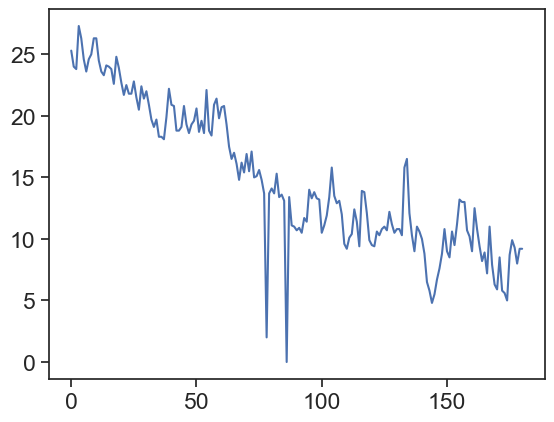

In [40]:
#| code-fold: false
plt.plot(df['tmin'])

## how to deal with dates

We want the dates to appear on the horizontal axis.  
Interpret 'date' column as a pandas datetime, see how it looks different from before  
before: 01/09/20  
after: 2020-09-01

In [41]:
#| code-fold: false
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df

,date,tmax,tmin,wind,rain24h,rain_cumulative
0,2020-09-01,32.8,25.3,29.7,0.0,0.0
1,2020-09-02,33.0,24.0,28.8,0.0,0.0
2,2020-09-03,34.2,23.8,31.6,0.0,0.0
3,2020-09-04,36.3,27.3,24.2,0.0,0.0
4,2020-09-05,34.2,26.3,22.4,0.0,0.0
...,...,...,...,...,...,...
176,2021-02-24,20.6,9.9,28.8,0.0,481.7
177,2021-02-25,19.4,9.3,23.3,0.0,481.7
178,2021-02-26,21.3,8.0,24.2,0.1,481.8
179,2021-02-27,23.4,9.2,30.6,0.0,481.8


### date as dataframe index

Make 'date' the dataframe's index (leftmost column, but not really a column!)

In [42]:
#| code-fold: false
df = df.set_index('date')
df

,tmax,tmin,wind,rain24h,rain_cumulative
date,,,,,
2020-09-01,32.8,25.3,29.7,0.0,0.0
2020-09-02,33.0,24.0,28.8,0.0,0.0
2020-09-03,34.2,23.8,31.6,0.0,0.0
2020-09-04,36.3,27.3,24.2,0.0,0.0
2020-09-05,34.2,26.3,22.4,0.0,0.0
...,...,...,...,...,...
2021-02-24,20.6,9.9,28.8,0.0,481.7
2021-02-25,19.4,9.3,23.3,0.0,481.7
2021-02-26,21.3,8.0,24.2,0.1,481.8


## plot again, now with dates

Plot minimum temperature, now we have dates on the horizontal axis

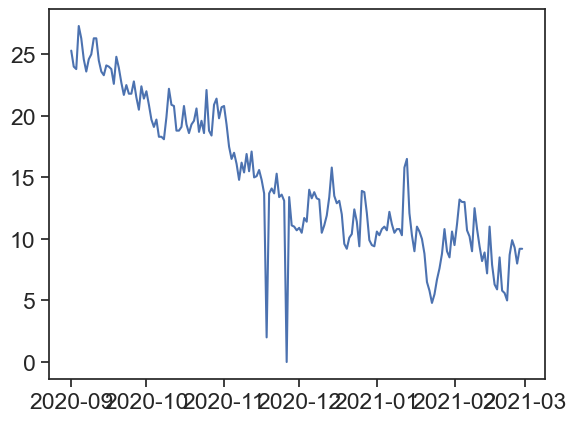

In [43]:
#| code-fold: false
plt.plot(df['tmin'])

## we're getting there! the graph could look better

Let's make the graph look better: labels, title, slanted dates, etc

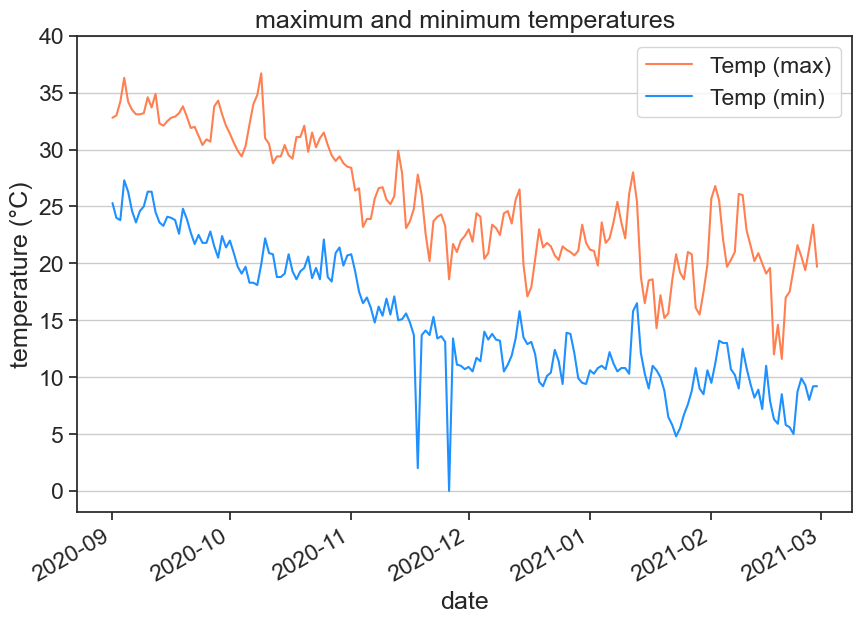

In [69]:
#| code-fold: false
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# two line plots
ax.plot(df['tmax'], color="coral", label="Temp (max)")
ax.plot(df['tmin'], color="dodgerblue", label="Temp (min)")
# axes labels and figure title
ax.set_xlabel('date')
ax.set_ylabel('temperature (°C)')
ax.set_title('maximum and minimum temperatures')
# some ticks adjustments
ax.set_yticks(np.arange(0,45,5))  # we can choose where to put ticks
ax.grid(axis='y')         # makes horizontal lines
plt.gcf().autofmt_xdate()  # makes slanted dates
# legend
ax.legend(loc='upper right')
# save png figure
plt.savefig("temp_max_min.png")

## make the following figure

Use the following function to plot bars for daily rainfall
```python
ax.bar(x_array, y_array)
```

Can you write yourself some lines of code that calculate the cumulative rainfall from the daily rainfall?

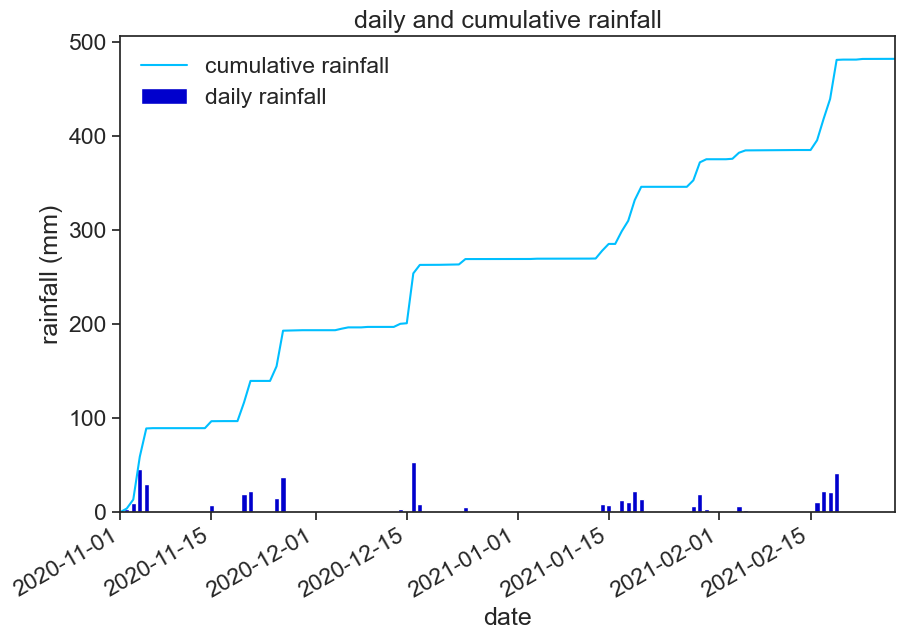

In [71]:
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))

# line and bar plots
ax.bar(df.index, df['rain24h'], color="mediumblue", label="daily rainfall")

# there are many ways of calculating the cumulative rain

# method 1, use a for loop:
# rain = df['rain24h'].to_numpy()
# cumulative = rain * 0
# for i in range(len(rain)):
#     cumulative[i] = np.sum(rain[:i])
# df['cumulative1'] = cumulative

# method 2, use list comprehension:
# rain = df['rain24h'].to_numpy()
# cumulative = [np.sum(rain[:i]) for i in range(len(rain))]
# df['cumulative2'] = cumulative

# method 3, use existing functions:
df['cumulative3'] = np.cumsum(df['rain24h'])

ax.plot(df['cumulative3'], color="deepskyblue", label="cumulative rainfall")
# compare our cumulative rainfall with the downloaded data
# ax.plot(df['rain_cumulative'], 'x')
# axes labels and figure title
ax.set(xlabel='date',
       ylabel='rainfall (mm)',
       title='daily and cumulative rainfall',
       xlim=pd.to_datetime(['2020-11-01','2021-02-28'])
      )
# some ticks adjustments
plt.gcf().autofmt_xdate()  # makes slanted dates
# legend
ax.legend(loc='upper left', frameon=False)
# save png figure
plt.savefig("cumulative_rainfall.png")

## make another figure

In order to choose just a part of the time series, you can use the following:
```python
start_date = '2021-01-01'
end_date = '2021-01-31'
january = df[start_date:end_date]
```

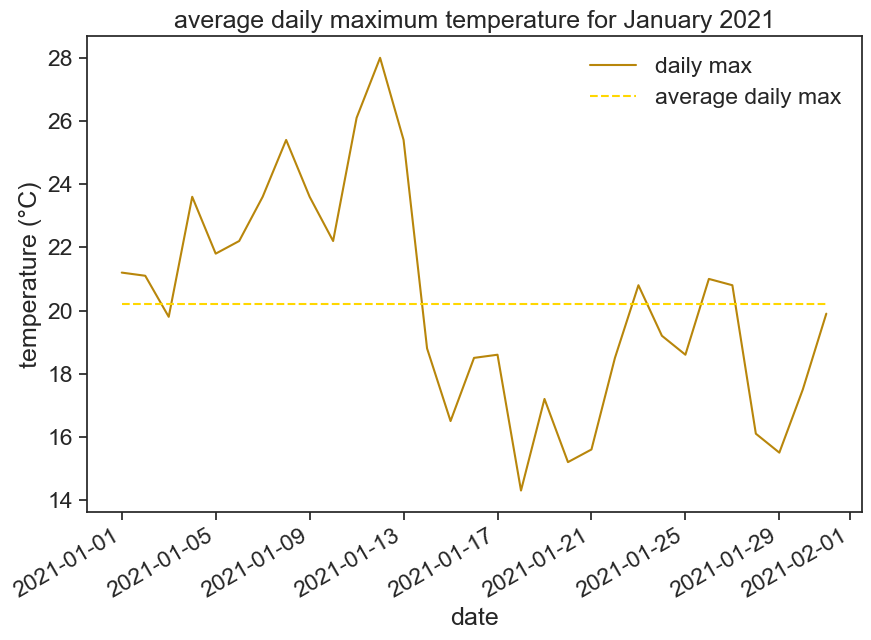

In [74]:
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# define date range
start_date = '2021-01-01'
end_date = '2021-01-31'
january = df.loc[start_date:end_date, 'tmax']
# plots
ax.plot(january, color="darkgoldenrod", label="daily max")
ax.plot(january*0 + january.mean(), color="gold", linestyle="--", label="average daily max")
# axes labels and figure title
ax.set_xlabel('date')
ax.set_ylabel('temperature (°C)')
ax.set_title('average daily maximum temperature for January 2021')
# some ticks adjustments
plt.gcf().autofmt_xdate()  # makes slanted dates
# legend
ax.legend(loc='upper right', frameon=False)
# save png figure
plt.savefig("average_max_temp.png")

## one last figure for today

Use the following code to create histograms with user-defined bins:
```python
b = np.arange(0, 56, 5)  # bins from 0 to 55, width = 5
ax.hist(df['wind'], bins=b, density=True)
```

Play with the bins, see what happens. What does `density=True` do?

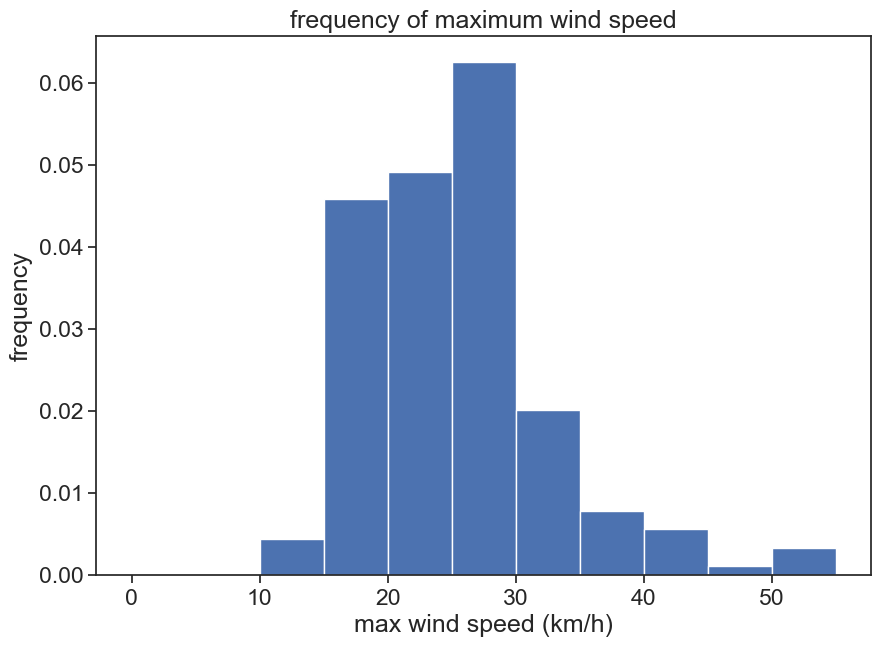

In [47]:
#| code-fold: false
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# histogram
b = np.arange(0, 56, 5)  # bins from 0 to 55, width = 5
ax.hist(df['wind'], bins=b, density=True)
# axes labels and figure title
ax.set(xlabel='max wind speed (km/h)',
       ylabel='frequency',
       title='frequency of maximum wind speed'
      )
# save png figure
plt.savefig("wind-histogram.png")

# homework

Go back to the weather station website, download one year of data from 01.01.2020 to 31.12.2020 (24h data). If you can't download the data, just click <a href="1year.csv" download>here</a>. 
Make the following graph:
- daily tmax and tmin
- smoothed data for tmax and tmin

In order to smooth the data with a 30 day window, use the following function:  
`df['tmin'].rolling(30, center=True).mean()`  
This means that you will take the mean of 30 days, and put the result in the center of this 30-day window.

Play with this function, see what you can do with it. What happens when you change the size of the window? Why is the smoothed data shorter than the original data? See the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) for `rolling` to find more options.

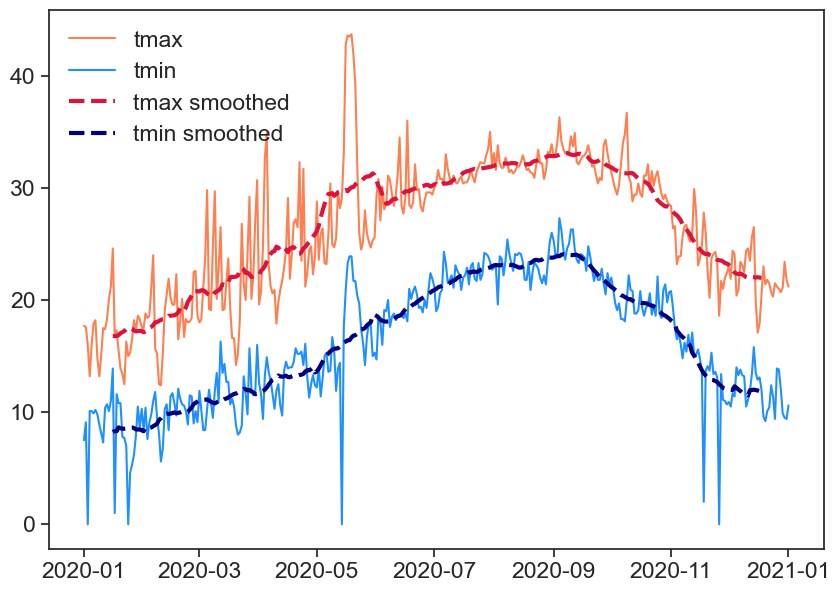

In [67]:
fig, ax = plt.subplots(figsize=(10,7))
col_names = ['date', 'tmax', 'tmin', 'wind', 'rain24h', 'rain_cumulative']
df2 = pd.read_csv("1year.csv",
                  skiprows=5,
                  encoding='latin1',
                  names=col_names,
                  parse_dates=['date'],
                  dayfirst=True,
                  index_col='date'
                 )
plt.plot(df2['tmax'], label='tmax', color="coral")
plt.plot(df2['tmin'], label='tmin', color="dodgerblue")
tmin_smooth = df2['tmin'].rolling(30, center=True).mean()
tmax_smooth = df2['tmax'].rolling(30, center=True).mean()
plt.plot(tmax_smooth, label='tmax smoothed', color="crimson", linestyle="--", linewidth=3)
plt.plot(tmin_smooth, label='tmin smoothed', color="navy", linestyle="--", linewidth=3)
plt.legend(frameon=False)
plt.savefig("t_smoothed.png")